In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/loan_data_set.csv')

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df = df.drop('Loan_ID', axis=1)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
temp = df['Loan_Status'].value_counts()

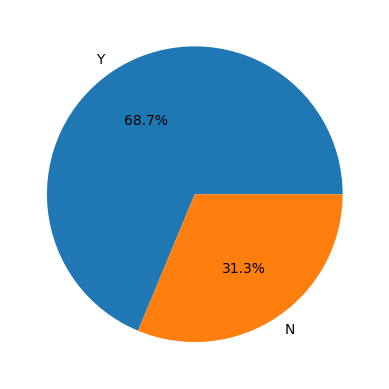

In [ ]:
plt.pie(temp.values,
		labels=temp.index,
		autopct='%1.1f%%')
plt.show()

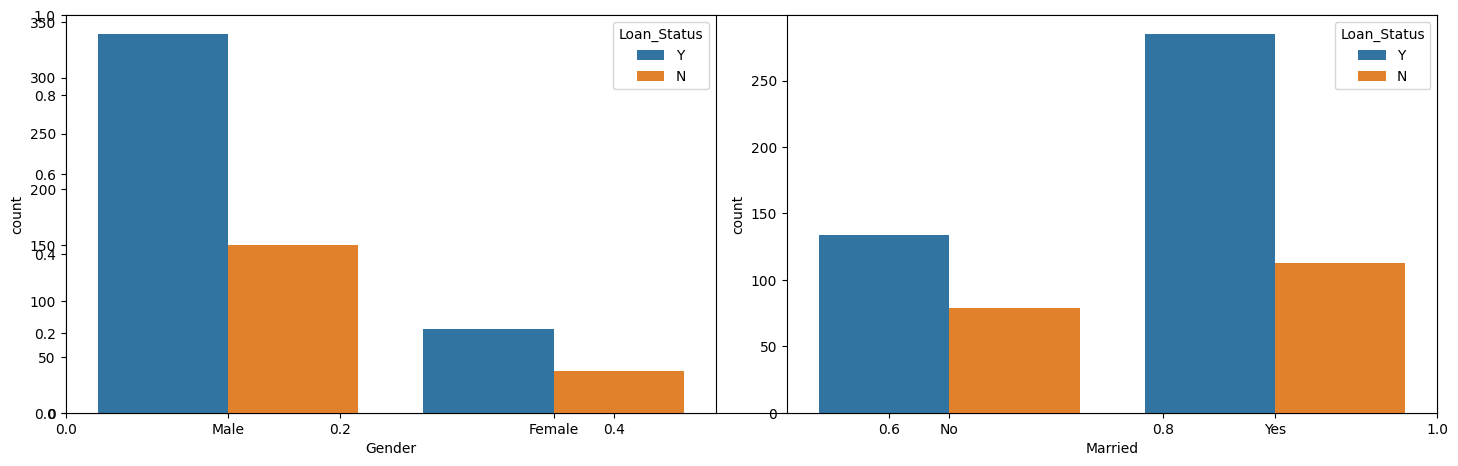

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
	plt.subplot(1, 2, i+1)
	sns.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

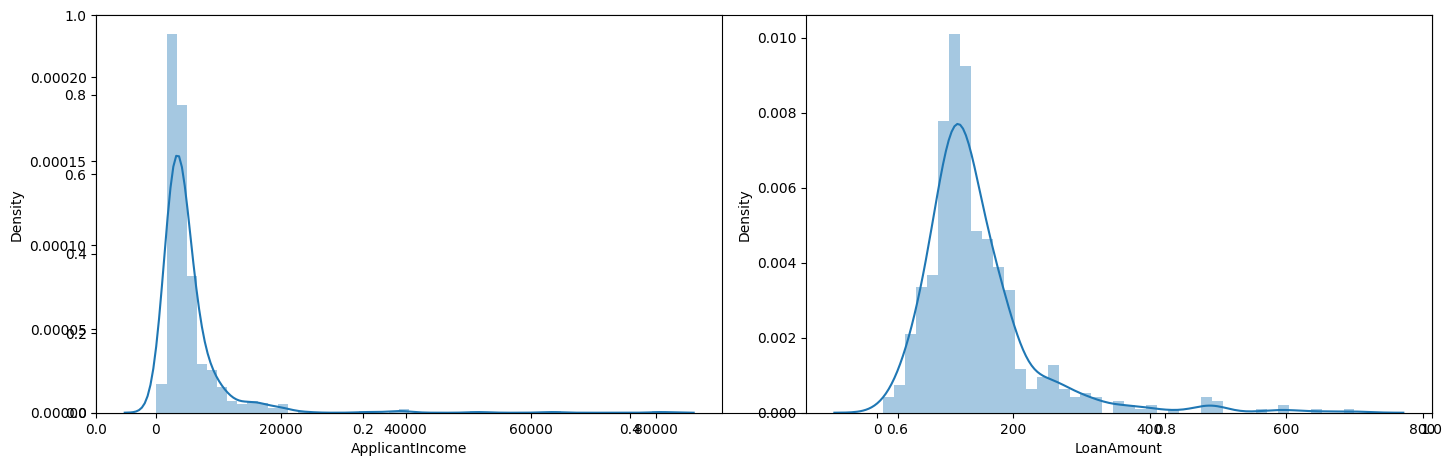

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
	plt.subplot(1, 2, i+1)
	sns.distplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [ ]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_1 = LogisticRegression()

In [ ]:
model_1.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model_1.score(x_train, y_train)

0.8044806517311609

In [ ]:
model_1.score(x_test, y_test)

0.8373983739837398

In [ ]:
y_pred = model_1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {round(accuracy * 100, 2)}%")

Accuracy Score: 83.74%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[15 18]
 [ 2 88]]


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_2 = DecisionTreeClassifier()

In [ ]:
model_2.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_2.score(x_train, y_train)

1.0

In [ ]:
model_2.score(x_test, y_test)

0.6585365853658537

In [ ]:
y_pred_dec = model_2.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dec)
print(f"Accuracy Score: {round(accuracy * 100, 2)}%")

Accuracy Score: 65.85%


In [ ]:
cm = confusion_matrix(y_test, y_pred_dec)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[17 16]
 [26 64]]


In [ ]:
report = classification_report(y_test, y_pred_dec)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.52      0.45        33
           1       0.80      0.71      0.75        90

    accuracy                           0.66       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.69      0.66      0.67       123



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_3 = RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
model_3.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
model_3.score(x_train, y_train)

1.0

In [ ]:
model_3.score(x_test, y_test)

0.7886178861788617

In [ ]:
y_pred_rand = model_3.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rand)
print(f"Accuracy Score: {round(accuracy * 100, 2)}%")

Accuracy Score: 78.86%


In [ ]:
cm = confusion_matrix(y_test, y_pred_rand)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[14 19]
 [ 7 83]]


In [ ]:
report = classification_report(y_test, y_pred_rand)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.42      0.52        33
           1       0.81      0.92      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.67      0.69       123
weighted avg       0.77      0.79      0.77       123



In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_4 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
model_4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_4.score(x_train, y_train)

1.0

In [ ]:
model_4.score(x_test, y_test)

0.8130081300813008

In [ ]:
y_pred_XGBClassifier = model_4.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_XGBClassifier)

0.8130081300813008

In [ ]:
report = classification_report(y_test, y_pred_XGBClassifier)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        33
           1       0.87      0.88      0.87        90

    accuracy                           0.81       123
   macro avg       0.76      0.76      0.76       123
weighted avg       0.81      0.81      0.81       123



In [ ]:
import joblib

# Save the model
joblib.dump(model_4, 'loan_eligibility_xgb_model.pkl')

['loan_eligibility_xgb_model.pkl']

In [ ]:
from google.colab import files
files.download('loan_eligibility_xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import numpy as np

# Load model
model = joblib.load('loan_eligibility_xgb_model.pkl')

def predict_loan_eligibility(input_data):
    # input_data should be a list or array in the same order as training
    prediction = model.predict([input_data])[0]
    return "Eligible ✅" if prediction == 1 else "Not Eligible ❌"


In [ ]:
def get_user_input():
    """
    Collects user input from the console and returns it as a list
    """
    print("Please enter the following loan application details:")

    Gender = input("Gender (Male/Female): ").strip().lower()
    Gender = 1 if Gender == "male" else 0

    Married = input("Married? (Yes/No): ").strip().lower()
    Married = 1 if Married == "yes" else 0

    Dependents = input("Number of Dependents (0, 1, 2, 3+): ").strip()
    Dependents = 3 if Dependents == "3+" else int(Dependents)

    Education = input("Education (Graduate/Not Graduate): ").strip().lower()
    Education = 1 if Education == "graduate" else 0

    Self_Employed = input("Self Employed? (Yes/No): ").strip().lower()
    Self_Employed = 1 if Self_Employed == "yes" else 0

    ApplicantIncome = float(input("Applicant's Monthly Income: ").strip())

    CoapplicantIncome = float(input("Coapplicant's Monthly Income: ").strip())

    LoanAmount = float(input("Loan Amount (in thousands): ").strip())

    Loan_Amount_Term = float(input("Loan Term (in days): ").strip())

    Credit_History = float(input("Credit History (1.0 for good, 0.0 for bad): ").strip())

    Property_Area = input("Property Area (Urban/Semiurban/Rural): ").strip().lower()
    Property_Area = {"urban": 2, "semiurban": 1, "rural": 0}[Property_Area]

    return [
        Gender,
        Married,
        Dependents,
        Education,
        Self_Employed,
        ApplicantIncome,
        CoapplicantIncome,
        LoanAmount,
        Loan_Amount_Term,
        Credit_History,
        Property_Area,
    ]

# Main runner
if __name__ == "__main__":
    user_input = get_user_input()
    result = predict_loan_eligibility(user_input)
    print("\nLoan Prediction Result:", result)

Please enter the following loan application details:
